In [22]:
import pandas as pd
import seaborn as sns
from sklearn.metrics import roc_auc_score

In [14]:
path = '~/ehec/sbxw_files_2/fibrillatioNN_prediction/sbxw/tables/seuma2022_41467_2022_34742_MOESM6_ESM_allvariants_labels.csv'
df = pd.read_csv(path,index_col=0)
df

,aa_seq,ID,dataset,mean_count,nscore_c,nscore1_c,nscore2_c,nscore3_c,sigma,fAD,is_amyloid
0,DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA,WT;D-1-D;A-2-A;E-3-E;F-4-F;R-5-R;H-6-H;D-7-D;S...,WT,1.527546e+06,0.000000,0.241693,0.018870,-0.218536,0.455606,non-fAD,False
1,KAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA,D-1-K,single,7.256667e+02,0.479471,0.590382,0.191242,0.848050,0.461254,non-fAD,False
2,DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLEVGGVVIA,M-35-E,single,7.083333e+02,-3.966931,-4.092460,-5.340983,-3.732004,0.717547,non-fAD,False
3,DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLDVGGVVIA,M-35-D,single,1.250000e+03,-3.793980,-2.806221,-4.061314,-4.114174,0.549851,non-fAD,False
4,DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLAVGGVVIA,M-35-A,single,5.936667e+02,-3.900306,-3.347935,-2.832616,-4.577864,0.666003,non-fAD,False
...,...,...,...,...,...,...,...,...,...,...,...
749,DAEFRHDSGYEVHHQKLVFFAHDVGSNKGAIIGLMVGGVVIA,E-22-H,single,2.710000e+02,1.546123,2.053437,1.826236,0.715626,0.462087,non-fAD,False
750,DAEFRHDSGYEVHHQKLVFFAPDVGSNKGAIIGLMVGGVVIA,E-22-P,single,9.053333e+02,3.238879,3.638653,3.243061,2.946959,0.460813,non-fAD,False
751,DAEFRHDSGYEVHHQKLVFFARDVGSNKGAIIGLMVGGVVIA,E-22-R,single,1.009667e+03,1.125611,0.679963,1.232940,1.292268,0.458231,non-fAD,False
752,DAEFRHDSGYEVHHQKLVFFAKDVGSNKGAIIGLMVGGVVIA,E-22-K,single,1.118333e+03,0.590773,0.885975,0.672220,0.234799,0.459884,fAD_d,True


In [5]:
df.ID.nunique()

754

In [6]:
with open('fastas/seuma2022_41467_2022_34742_MOESM6_ESM_allvariants_labels.fasta','w') as file:
    for i,row in df.iterrows():
        file.write(f'>{row.ID}'+'\n')
        file.write(row.aa_seq+'\n')

In [8]:
!/nfs_home/users/sbxw/mambaforge/bin/conda run \
    --no-capture-output \
    -p /novo/projects/departments/cdd/molecular_ai/sbxw/mambaforge_envs/canyaenv \
    canya \
    --input /novo/users/sbxw/ehec/sbxw_files_2/fibrillatioNN_prediction/sbxw/fastas/seuma2022_41467_2022_34742_MOESM6_ESM_allvariants_labels.fasta \
    --output /novo/users/sbxw/ehec/sbxw_files_2/fibrillatioNN_prediction/sbxw/tables/seuma2022_41467_2022_34742_MOESM6_ESM_allvariants_labels_CANYA.tsv

2025-05-31 19:22:16.677312: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2025-05-31 19:22:16.677345: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2025-05-31 19:22:21.318360: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2025-05-31 19:22:21.318419: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (compute-dy-c7i-4xlarge-3): /proc/driver/nvidia/version does not exist
2025-05-31 19:22:21.319151: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operati

In [16]:
path = '/novo/users/sbxw/ehec/sbxw_files_2/fibrillatioNN_prediction/sbxw/tables/seuma2022_41467_2022_34742_MOESM6_ESM_allvariants_labels_CANYA.tsv'
out = pd.read_csv(path,sep='\t')
out = out.rename(columns={'seqid':'ID'})
out

,ID,CANYA
0,A-2-C,0.194542
1,A-2-D,0.191232
2,A-2-E,0.191232
3,A-2-F,0.193732
4,A-2-G,0.192643
...,...,...
749,Y-10-R,0.190694
750,Y-10-S,0.207126
751,Y-10-T,0.220689
752,Y-10-V,0.213590


In [26]:
merge = df.merge(out,on='ID')
merge.to_csv('tables/seuma2022_41467_2022_34742_MOESM6_ESM_allvariants_labels_CANYA.csv')
merge

,aa_seq,ID,dataset,mean_count,nscore_c,nscore1_c,nscore2_c,nscore3_c,sigma,fAD,is_amyloid,CANYA
0,DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA,WT;D-1-D;A-2-A;E-3-E;F-4-F;R-5-R;H-6-H;D-7-D;S...,WT,1.527546e+06,0.000000,0.241693,0.018870,-0.218536,0.455606,non-fAD,False,0.191842
1,KAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA,D-1-K,single,7.256667e+02,0.479471,0.590382,0.191242,0.848050,0.461254,non-fAD,False,0.194542
2,DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLEVGGVVIA,M-35-E,single,7.083333e+02,-3.966931,-4.092460,-5.340983,-3.732004,0.717547,non-fAD,False,0.194542
3,DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLDVGGVVIA,M-35-D,single,1.250000e+03,-3.793980,-2.806221,-4.061314,-4.114174,0.549851,non-fAD,False,0.191842
4,DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLAVGGVVIA,M-35-A,single,5.936667e+02,-3.900306,-3.347935,-2.832616,-4.577864,0.666003,non-fAD,False,0.191842
...,...,...,...,...,...,...,...,...,...,...,...,...
749,DAEFRHDSGYEVHHQKLVFFAHDVGSNKGAIIGLMVGGVVIA,E-22-H,single,2.710000e+02,1.546123,2.053437,1.826236,0.715626,0.462087,non-fAD,False,0.233643
750,DAEFRHDSGYEVHHQKLVFFAPDVGSNKGAIIGLMVGGVVIA,E-22-P,single,9.053333e+02,3.238879,3.638653,3.243061,2.946959,0.460813,non-fAD,False,0.201261
751,DAEFRHDSGYEVHHQKLVFFARDVGSNKGAIIGLMVGGVVIA,E-22-R,single,1.009667e+03,1.125611,0.679963,1.232940,1.292268,0.458231,non-fAD,False,0.194856
752,DAEFRHDSGYEVHHQKLVFFAKDVGSNKGAIIGLMVGGVVIA,E-22-K,single,1.118333e+03,0.590773,0.885975,0.672220,0.234799,0.459884,fAD_d,True,0.191842


<Axes: xlabel='nscore3_c', ylabel='CANYA'>

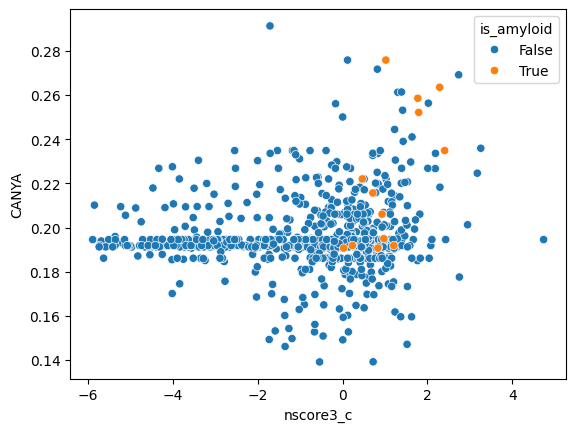

In [27]:
sns.scatterplot(data=merge.sort_values(by='is_amyloid'),
                x='nscore3_c',y='CANYA',hue='is_amyloid')

In [23]:
roc_auc_score(merge['is_amyloid'],merge['CANYA'])

0.7376206789162255

In [25]:
filt = merge[~merge['nscore3_c'].isna()]
roc_auc_score(filt['is_amyloid'],filt['nscore3_c'])

0.8566289281557506